## EP1 MecComp

Alunos:  

Luan Brito   e   Vinicius Costa

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def runge_kutta(f,Y0,t0,h,tf=None,n=None):
    """
    f: função a ser aplicada
    Y0: vetor inicial
    t0: tempo inicial
    h: passo de integração
    tf: tempo final
    n: número de passos
    """
    if tf is None:
        tf = t0 + n*h
    if n is None:
        n = int((tf-t0)/h)
    t = np.linspace(t0,tf,n+1)
    Y = np.zeros((n+1,len(Y0)))
    dY=np.zeros((n+1,len(Y0)))
    Y[0] = Y0
    for i in range(n):
        k1 = f(t[i],Y[i])
        k2 = f(t[i]+h/2,Y[i]+h*k1/2)
        k3 = f(t[i]+h/2,Y[i]+h*k2/2)
        k4 = f(t[i]+h,Y[i]+h*k3)
        Y[i+1] = Y[i] + h*(k1+2*k2+2*k3+k4)/6
        dY[i] = k1
    dY[n]=f(t[n],Y[n])

    return t,Y,dY

def f(t,Y):
    #Constants
    Ra = 200
    Rb = 20
    La = 0.01
    Lb = 0.5
    C = 0.002
    e = lambda t: np.cos(t*600)/La

    #Variables
    i1 = Y[0]
    i2 = Y[1]
    q = Y[2]

    #Calculates the slope vector
    dY = np.zeros(3)
    dY[0] = e(t)+(-Ra*(i1-i2)-q/C)/La
    dY[1] = (+Ra*(i1-i2)-Rb*i2+q/C)/Lb
    dY[2] = i1-i2

    return dY

a) Resolva as equações para $0 \leq t \leq 0,03s$ utilizando o Método de Runge-Kutta de 4a ordem que deve ser implementado pelo aluno. Verifique a influência do passo "$\Delta t$" sobre a solução – escolha três passos (pequeno médio e grande) (em que aspectos você vai verificar essa influência? Por quê?). Para cada valor de passo escolhido plote todos os itens $i_{1}(t),\dot{i_{1}(t)},i_{2}(t),\dot{i_{2}(t)},q(t)$ num mesmo gráfico, em função de t. Para isso utilize escalas diferentes na plotagem de $i_{1}(t),\dot{i_{1}(t)},i_{2}(t),\dot{i_{2}(t)},q(t)$, ou seja, p.ex. $i_{1}(t).10^{p},\dot{i_{1}(t)}.10^{q},i_{2}(t).10^{r},\dot{i_{2}(t)}.10^{s},q(t).10^{z}$. Encontre valores apropriados de $p, q, r, s e z$ de forma que todos os gráficos apareçam na plotagem

C:\Users\JULIAC~1\AppData\Local\Temp/ipykernel_36240/1716317248.py:47: RuntimeWarning: overflow encountered in double_scalars
  dY[0] = e(t)+(-Ra*(i1-i2)-q/C)/La
C:\Users\JULIAC~1\AppData\Local\Temp/ipykernel_36240/1716317248.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dY[0] = e(t)+(-Ra*(i1-i2)-q/C)/La
C:\Users\JULIAC~1\AppData\Local\Temp/ipykernel_36240/1716317248.py:48: RuntimeWarning: invalid value encountered in double_scalars
  dY[1] = (+Ra*(i1-i2)-Rb*i2+q/C)/Lb
C:\Users\JULIAC~1\AppData\Local\Temp/ipykernel_36240/1716317248.py:25: RuntimeWarning: invalid value encountered in add
  Y[i+1] = Y[i] + h*(k1+2*k2+2*k3+k4)/6


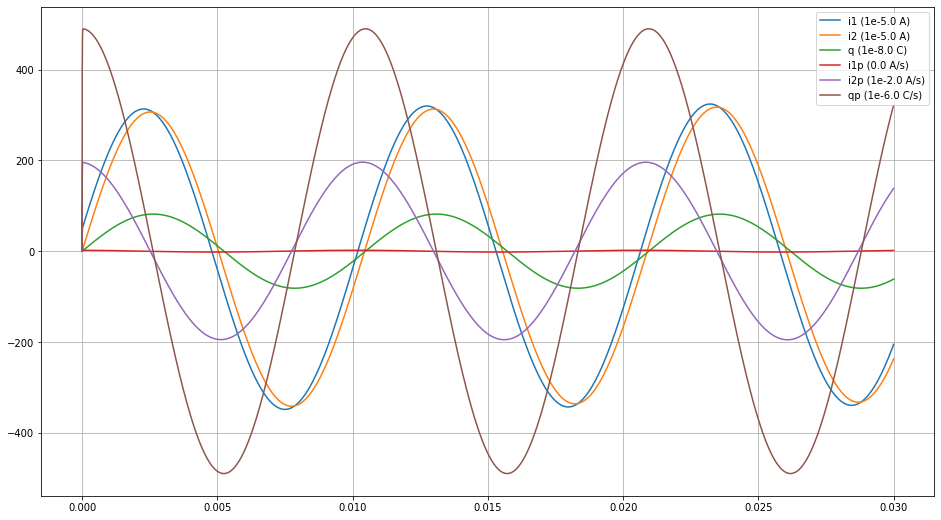

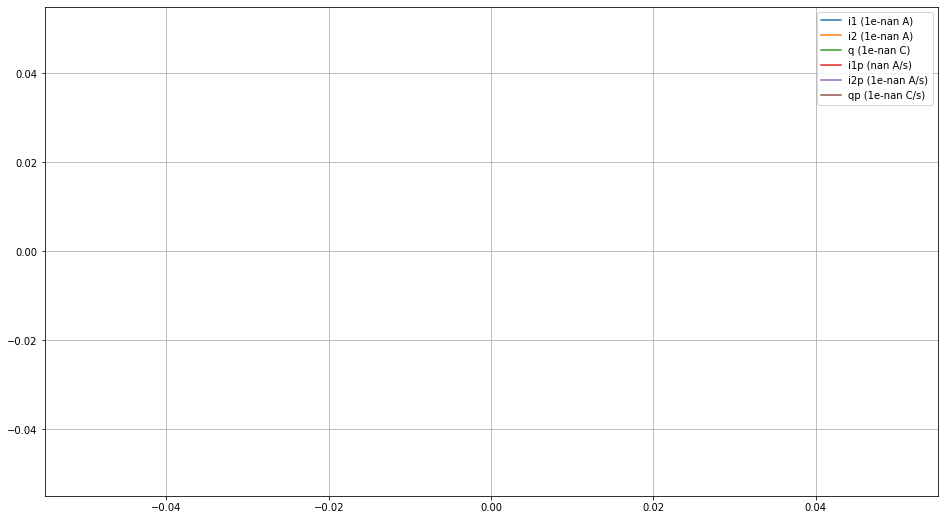

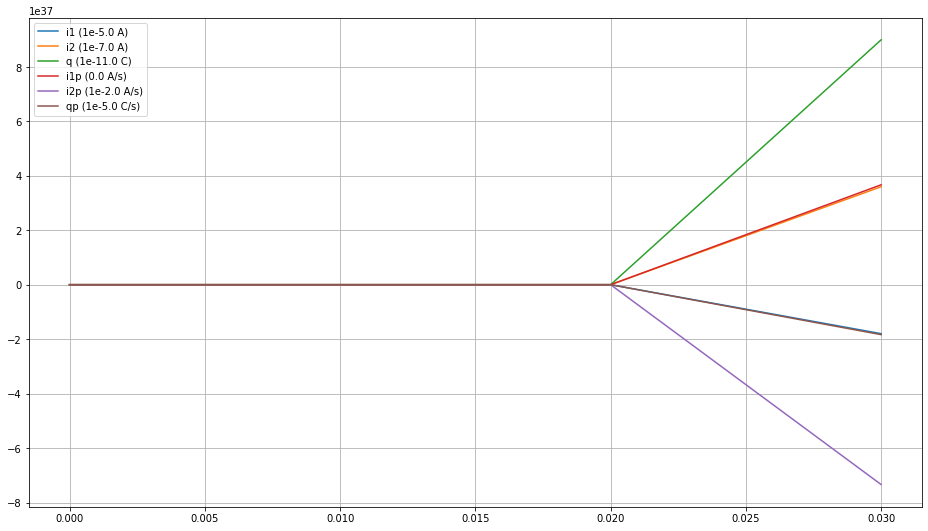

In [12]:
def plot(t,Y,dY):
    Y = np.concatenate((Y,dY),axis=1)
    OGs = [np.floor(np.log10(abs(x.min()-x.max()))) for x in Y.T]
    scaler = [max(OGs)-x for x in OGs]
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1,1,1)
    ax.plot(t,Y[:,0]*10**scaler[0],label=f'i1 (1e-{scaler[0]} A)')
    ax.plot(t,Y[:,1]*10**scaler[1],label=f'i2 (1e-{scaler[1]} A)')
    ax.plot(t,Y[:,2]*10**scaler[2],label=f'q (1e-{scaler[2]} C)')
    ax.plot(t,dY[:,0]*10**scaler[3],label=f'i1p ({scaler[3]} A/s)')
    ax.plot(t,dY[:,1]*10**scaler[4],label=f'i2p (1e-{scaler[4]} A/s)')
    ax.plot(t,dY[:,2]*10**scaler[5],label=f'qp (1e-{scaler[5]} C/s)')
    ax.legend()
    ax.grid()

#passo pequeno
t,Y,dY = runge_kutta(f, [0,0,0], 0, (0.000001)/2, tf=0.03)
plot(t,Y,dY)
#passo medio
t,Y,dY = runge_kutta(f, [0,0,0], 0, 0.0001, tf=0.03)
plot(t,Y,dY)
#passo grande
t,Y,dY = runge_kutta(f, [0,0,0], 0, 0.01, tf=0.03)
plot(t,Y,dY)
